# 1. 데이터 분포 생성 (numpy, seaborn)

- 난수 생성 (seed 고정)
- seaborn 패키지 활용한 히스토그램 작성

In [16]:
# np.random.seed(0)으로 seed 설정해 생성되는 난수를 고정
np.random.seed(0)
x = np.random.normal(size = 21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

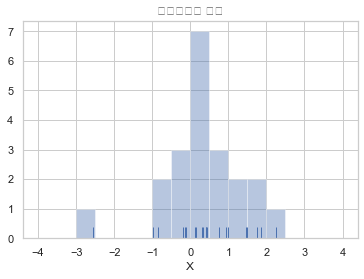

In [20]:
# 히스토그램 작성 (구간 : -4< <4, 구간크기 : 0.5)
# seaborn -> distplot method
bins = np.linspace(-4,4,17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램 실습")
plt.xlabel("X")
plt.show()

# 2. 기술통계량 (numpy)

- 표본평균
- 표본중앙값
- 이산데이터의 최댓값
- 데이터 구간 생성 후, 각 구간 내 데이터 갯수 확인

In [22]:
# 표본평균
np.mean(x)

0.4206524782418389

In [23]:
# 표본중앙값
np.median(x)

0.4001572083672233

In [33]:
# np.histogram(x,bins=bins) ==> 구간 경계 확인 및 데이터 갯수 확인
# 최빈값 = 연속형 데이터의 경우, 최빈값이 아닌 최빈구간이 존재
ns, range_ = np.histogram(x,bins=bins)
print("최빈구간 내 데이터 수 : {}, 구간 별 데이터 갯수 : {}".format(np.argmax(ns),ns))
bins_max = np.argmax(ns)
print("최빈구간 = {} ~ {}".format(bins[bins_max], bins[bins_max+1]))

최빈구간 내 데이터 수 : 8, 구간 별 데이터 갯수 : [0 0 1 0 0 0 2 3 7 3 2 2 1 0 0 0]
최빈구간 = 0.0 ~ 0.5


# 3. Uni-modal Dist, Multi-modal Dist

    - iris data (petal length, 꽃잎길이)
    - histogram 명령 : np.histogram | df.hist() | sns.distplot(x, bins=bins)
    
### uni-modal / multi-modal 판별 예제

In [34]:
# 연습문제 7.1.1
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species'] = sy

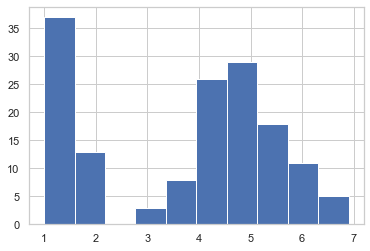

In [46]:
# petal length data has Uni-modal distribution?
df['petal length (cm)'].hist()

# petal length data has Multi-modal distribution

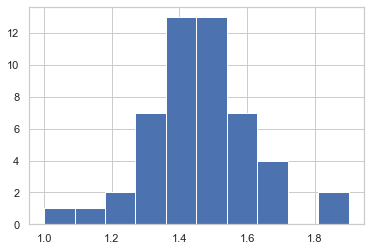

In [58]:
# What is the shape of petal length_Setosa(species) data?
df[df['species']=='setosa']['petal length (cm)'].hist()

# petal length_setosa(species) data has Uni-modal distribution

# 4. Symmetric Distribution (numpy)

- 분포가 대칭이면서 uni-modal 분포라면, 표본평균 = 표본중앙값 = 표본최빈값
- 비대칭으로 만드는 데이터가 대칭분포에 적용되면, 영향의 크기는 표본평균 > 표본중앙값 > 표본최빈값 순으로 적용된다.

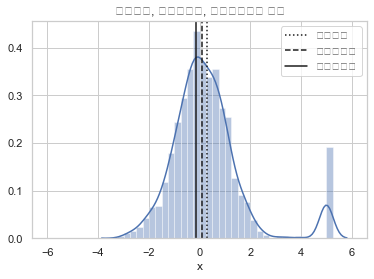

In [68]:
# 예시
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)]) #np.hstack == 배열을 <- 방향으로 붙이기
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)   # 최빈값 위치 찾기(index)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])   # 

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

### 히스토그램 도식화 및 기술통계량 탐색 (구간 확대 결과 비교)

구간이 10개 일 때
표본평균 : 5.552
표본중앙값 : 5.55
표본최빈값 : 5.5


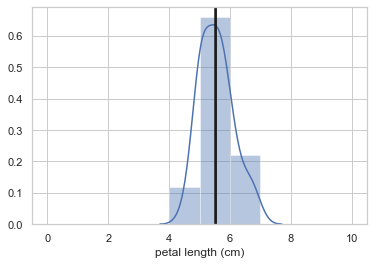

구간이 50개 일 때
표본평균 : 5.552
표본중앙값 : 5.55
표본최빈값 : 5.5


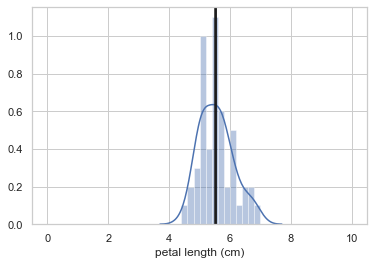

구간이 100개 일 때
표본평균 : 5.552
표본중앙값 : 5.55
표본최빈값 : 5.050000000000001


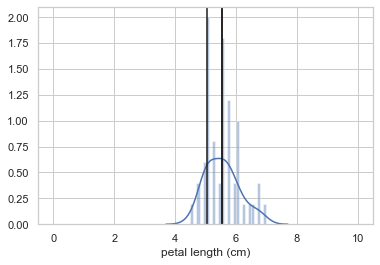

In [89]:
# 연습문제 7.1.2
# virginica 종의 petal length 데이터에 대해 표본평균, 중앙값, 최빈값을 히스토그램으로 그리고, 최빈값은 간격을 넓혀가며 탐색해라

# 데이터 생성
data = df[df['species'] == 'virginica']['petal length (cm)']

# 함수 생성 (기술통계량, 히스토그램 생성함수)
def Statistics(data,n,data_min=0,data_max=10):

    # 1. 대상 구간 생성
    bins = np.linspace(data_min,data_max,n+1)
    ns, _ = np.histogram(data,bins=bins)
    
    # 2. 기술통계량 생성
    sample_mean = np.mean(data)
    sample_median = np.median(data)
    mode = np.argmax(ns)   #최빈값(봉우리)의 데이터 위치 찾기(ns)
    sample_mode = (1/2)*(bins[mode]+bins[mode+1])   #최빈값 구간 지정(bins 구간으로 환산하면 어디인지 확인)
    print("구간이 {}개 일 때".format(n))
    print("표본평균 : {}".format(sample_mean))
    print("표본중앙값 : {}".format(sample_median))
    print("표본최빈값 : {}".format(sample_mode))
    
    # 3. 히스토그램 생성
    # histogram 명령 : np.histogram | df.hist() | sns.distplot(x, bins=bins)
    sns.distplot(data,bins=bins)
    plt.axvline(sample_mean,c='k')
    plt.axvline(sample_median,c='k')
    plt.axvline(sample_mode,c='k')
    plt.show()
    
    
Statistics(data,10)
Statistics(data,50)
Statistics(data,100)

# 5. 분산, 표준편차 (scipy, numpy)

- var()
- std()
- 자유도 옵션 : ddof 인수 사용 (비편향 표본분산, 비편향 표본표준편차 생성)

In [91]:
# 정규분포 데이터 생성 - scipy

sp.random.seed(0)
x = sp.stats.norm(0,2).rvs(1000) # 평균, 표준편차 = 0,2 인 정규분포 생성

In [92]:
# 편향 표본분산, 편향 표본표준편차
np.var(x), np.std(x)

(3.896937825248617, 1.9740663173380515)

In [93]:
# 비편향 표본분산, 비편향 표본표준편차
np.var(x, ddof=1), np.std(x, ddof=1)

(3.900838663912529, 1.9750540913890255)

### 다우지수 일간 수익률의 기술통계량 및 변동성 분석

In [97]:
import pandas_datareader.data as web

df = web.DataReader("DJCA", data_source='fred').dropna()["DJCA"]
r = np.log(df / df.shift(1)).dropna().values

구간이 100개 일 때
표본평균 : 0.00016749408501295264
표본중앙값 : 0.0007042430232169182
표본최빈값 : 0.0020000000000000018


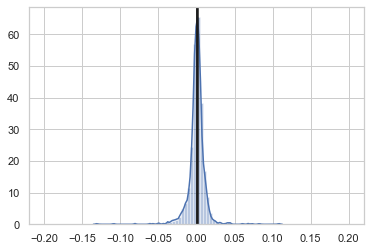

In [110]:
# 연습문제 7.1.3
# 1. 다우지수 일간수익률의 표본평균, 표본분산, 표본표준편차 탐색
Statistics(r,100,-0.20,0.20)

In [112]:
# 2. 연간 변동성 탐색
# 연간변동성 = 일간수익률 표준편차 * 1년(대략적인 영업일 256일의 제곱근=16일)
volatility = np.std(r)*np.sqrt(256) * 100
volatility

19.18150327324953

# 6. 표본왜도, 표본첨도(scipy)

- sp.stats.skew(x)
- sp.stats.kurtosis(x)

In [116]:
# 표본 왜도
sp.stats.skew(x)

0.03385895323565712

In [117]:
# 표본 첨도
sp.stats.kurtosis(x)

-0.0467663244783294

# 7. 표본 moment

- sp.stats.moment(x, 1) : 1차 모멘트
- sp.stats.moment(x, 2) : 2차 모멘트
- sp.stats.moment(x, 3) : 3차 모멘트
- sp.stats.moment(x, 4) : 4차 모멘트